# Reddit Classification Task

This project aims to accomplish a task of building a classifier model that accurately classifies a list of reddit comments into the proper labels of Medical Doctor, Veterinarian and Others. 
The classifier model explored were based on conventional Machine learning Algorithms focusing mainly on Logistic Regression and Support Vector Machine (SVM) due to their performance in performing classification tasks.

This code is divided into 3 main sections which are:
- Data Preprocessing
- Model Building
- Result and Conclusions

In [1]:
#libraries needed to run this code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline


from joblib import dump
%matplotlib inline

In [2]:
# Load the dataset

reddit_data = pd.read_csv('reddit_usernames_comments.csv')

# SECTION A

**Data Preprocessing**
- Cleaning data
- Feature Engineering: Adding neccessary columns with which the classifier model will be trained with

In [3]:
reddit_data.shape

(3259, 2)

In [4]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  3259 non-null   object
 1   comments  3259 non-null   object
dtypes: object(2)
memory usage: 51.1+ KB


In [5]:
reddit_data.describe()

,username,comments
count,3259,3259
unique,3259,3258
top,--solaris--,Why?|Why?|Why?|Why?|Why?|Why?
freq,1,2


In [6]:
#using a rule-based method to create a profession and category column with which the model will be trained on
# Define keywords for each category
medical_keywords = ['medical doctor', 'practicing doctor', 'medical school student', 'nurse', 'medical professional', 'doctor', 'Dr', 'healthcare provider']
veterinarian_keywords = ['veterinarian', 'practicing vet', 'vet student', 'vet tech', 'vet', 'animal doctor']

# Function to classify each comment and extract the keyword
def classify_comment(comment):
    # Check for Medical keywords
    for keyword in medical_keywords:
        if keyword in comment.lower():
            return keyword, 'Medical Doctor'
    # Check for Veterinarian keywords
    for keyword in veterinarian_keywords:
        if keyword in comment.lower():
            return keyword, 'Veterinarian'
    # Default to Others
    return 'Others', 'Others'

# Apply the classification function to each comment
reddit_data['profession'], reddit_data['category'] = zip(*reddit_data['comments'].apply(classify_comment))

In [7]:
reddit_data.head(5)

,username,comments,profession,category
0,--solaris--,I think a lot of other people made some good p...,doctor,Medical Doctor
1,-Mother_of_Doggos,"No, and it doesn’t suit you based on what you’...",Others,Others
2,-Tasear-,It's just the adjustment period to any new pla...,Others,Others
3,-Zyonia-,I am living this currently and when a trainee ...,Others,Others
4,-p-OodlesOfNoodles,Well that's disappointing that there is no cha...,vet,Veterinarian


In [8]:
# Cleaning text data: lowercasing and removing punctuation
reddit_data['cleaned_comments'] = reddit_data['comments'].str.lower().str.replace('[^\\w\\s]', '', regex=True)

In [9]:
reddit_data.head(5)

,username,comments,profession,category,cleaned_comments
0,--solaris--,I think a lot of other people made some good p...,doctor,Medical Doctor,i think a lot of other people made some good p...
1,-Mother_of_Doggos,"No, and it doesn’t suit you based on what you’...",Others,Others,no and it doesnt suit you based on what youve ...
2,-Tasear-,It's just the adjustment period to any new pla...,Others,Others,its just the adjustment period to any new plac...
3,-Zyonia-,I am living this currently and when a trainee ...,Others,Others,i am living this currently and when a trainee ...
4,-p-OodlesOfNoodles,Well that's disappointing that there is no cha...,vet,Veterinarian,well thats disappointing that there is no chan...


In [10]:
reddit_data.to_csv('updated_reddit.csv')

In [11]:
reddit_data['category'].value_counts()

Others            1991
Veterinarian       906
Medical Doctor     362
Name: category, dtype: int64

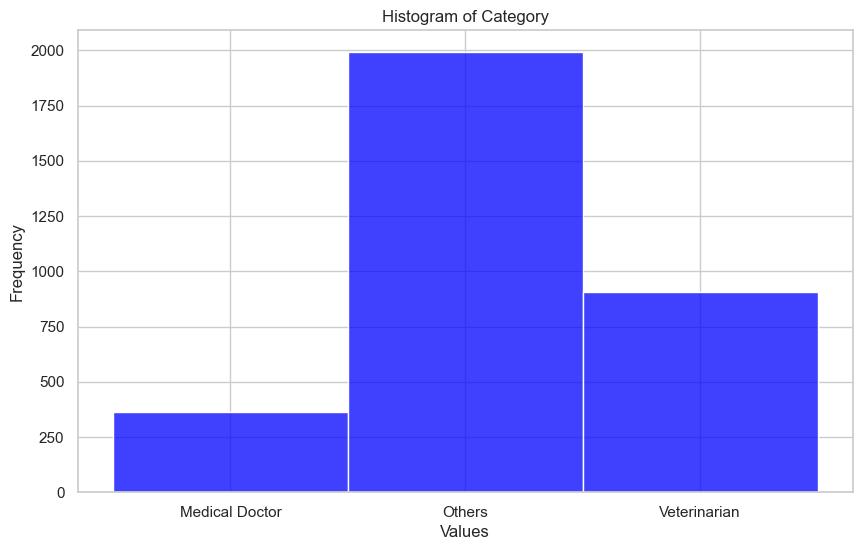

In [12]:
#checking the distribution of the data
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure with specified size
plt.figure(figsize=(10, 6))

# Plotting a histogram
sns.histplot(reddit_data['category'], kde=False, color='blue', bins=10)
plt.title('Histogram of Category')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

**Feature selection using TF-IDF**

In [13]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

## Apply TF-IDF to the comments
X = tfidf_vectorizer.fit_transform(reddit_data['cleaned_comments'])

## Encoding the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(reddit_data['category'])

In [14]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Overview of the data shapes after preprocessing
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2607, 1000), (652, 1000), (2607,), (652,))

# SECTION B

### Training with Logistic Regression

In [15]:
# training, validating and testing model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=50, max_iter=500)
logistic_model.fit(X_train, y_train)

cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5)

# Predict on the testing set
y_pred = logistic_model.predict(X_test)

# Calculate accuracy and other performance metrics
log_accuracy = accuracy_score(y_test, y_pred)

In [16]:
# Generate classification report
log_report = classification_report(y_test, y_pred, target_names=['Medical Doctor', 'Others', 'Veterinarian'], output_dict=True)

# Display the results
print(f'Accuracy: {log_accuracy * 100:.2f}%')
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score: {:.2f}".format(cv_scores.mean()))
print('Classification Report:')
for label, metrics in log_report.items():
    if label in ['Medical Doctor', 'Others', 'Veterinarian']:
        print(f'  {label}')
        print(f'    Precision: {metrics["precision"] * 100:.0f}%')
        print(f'    Recall: {metrics["recall"] * 100:.0f}%')
        print(f'    F1-Score: {metrics["f1-score"] * 100:.0f}%')

Accuracy: 87.88%
Cross-validation scores: [0.86781609 0.87164751 0.88099808 0.87140115 0.86948177]
Average cross-validation score: 0.87
Classification Report:
  Medical Doctor
    Precision: 93%
    Recall: 39%
    F1-Score: 55%
  Others
    Precision: 90%
    Recall: 98%
    F1-Score: 94%
  Veterinarian
    Precision: 83%
    Recall: 84%
    F1-Score: 83%


In [17]:
'''Considering the imbalance across the different categories in the dataset it is best to get the weighted and macro performance 
to fully access the performance of the model'''

# Calculate precision, recall, and F1-score using weighted average
precision_weighted, recall_weighted, f1_score_weighted, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("Weighted Precision: {:.2f}".format(precision_weighted))
print("Weighted Recall: {:.2f}".format(recall_weighted))
print("Weighted F1-Score: {:.2f}".format(f1_score_weighted))

print("\n")

# Calculate precision, recall, and F1-score using macro average
precision_macro, recall_macro, f1_score_macro, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
print("Macro Precision: {:.2f}".format(precision_macro))
print("Macro Recall: {:.2f}".format(recall_macro))
print("Macro F1-Score: {:.2f}".format(f1_score_macro))

Weighted Precision: 0.88
Weighted Recall: 0.88
Weighted F1-Score: 0.87


Macro Precision: 0.88
Macro Recall: 0.73
Macro F1-Score: 0.77


In [18]:
'''To find the optimal hyperparameters that yield the best model performance'''

# Setup GridSearchCV to find the best hyperparameters
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(random_state=50, max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameter and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_log)

In [19]:
# Generate classification report
C_report = classification_report(y_test, y_pred_log, target_names=['Medical Doctor', 'Others', 'Veterinarian'], output_dict=True)

# Display the results
print(f'best_param: {best_params}')
print(f'Score: {best_score * 100:.2f}%')
print(f'Accuracy: {best_accuracy * 100:.2f}%')
print('Classification Report:')
for label, metrics in C_report.items():
    if label in ['Medical Doctor', 'Others', 'Veterinarian']:
        print(f'  {label}')
        print(f'    Precision: {metrics["precision"] * 100:.0f}%')
        print(f'    Recall: {metrics["recall"] * 100:.0f}%')
        print(f'    F1-Score: {metrics["f1-score"] * 100:.0f}%')

best_param: {'C': 10}
Score: 89.76%
Accuracy: 90.64%
Classification Report:
  Medical Doctor
    Precision: 80%
    Recall: 63%
    F1-Score: 70%
  Others
    Precision: 93%
    Recall: 99%
    F1-Score: 96%
  Veterinarian
    Precision: 87%
    Recall: 84%
    F1-Score: 85%


### Training with Support Vector Machine (SVM)

In [20]:
# Initialize and train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear', C=1, random_state=60)
svm_model.fit(X_train, y_train)

cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5)

# Predict on the testing set
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy and other performance metrics for the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)

In [21]:
# Generate classification report
svm_report = classification_report(y_test, y_pred_svm, target_names=['Medical Doctor', 'Others', 'Veterinarian'], output_dict=True)

# Display the results
print(f'Accuracy: {svm_accuracy * 100:.2f}%')
print("Cross-validation scores:", cv_scores_svm)
print("Average cross-validation score: {:.2f}".format(cv_scores_svm.mean()))
print('Classification Report:')
for labels, metric in svm_report.items():
    if labels in ['Medical Doctor', 'Others', 'Veterinarian']:
        print(f'  {label}')
        print(f'    Precision_SVM: {metric["precision"] * 100:.0f}%')
        print(f'    Recall_SVM: {metric["recall"] * 100:.0f}%')
        print(f'    F1-Score_SVM: {metric["f1-score"] * 100:.0f}%')

Accuracy: 91.72%
Cross-validation scores: [0.89846743 0.90613027 0.92130518 0.9059501  0.9059501 ]
Average cross-validation score: 0.91
Classification Report:
  weighted avg
    Precision_SVM: 93%
    Recall_SVM: 61%
    F1-Score_SVM: 74%
  weighted avg
    Precision_SVM: 93%
    Recall_SVM: 99%
    F1-Score_SVM: 96%
  weighted avg
    Precision_SVM: 87%
    Recall_SVM: 88%
    F1-Score_SVM: 88%


In [22]:
# Calculate precision, recall, and F1-score using weighted average
precision_weighted, recall_weighted, f1_score_weighted, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')
print("Weighted Precision: {:.2f}".format(precision_weighted))
print("Weighted Recall: {:.2f}".format(recall_weighted))
print("Weighted F1-Score: {:.2f}".format(f1_score_weighted))

print("\n")

# Calculate precision, recall, and F1-score using macro average
precision_macro, recall_macro, f1_score_macro, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='macro')
print("Macro Precision: {:.2f}".format(precision_macro))
print("Macro Recall: {:.2f}".format(recall_macro))
print("Macro F1-Score: {:.2f}".format(f1_score_macro))

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-Score: 0.91


Macro Precision: 0.91
Macro Recall: 0.83
Macro F1-Score: 0.86


In [23]:
# feature selection with TF-IDF 
# Experiment with different settings for TF-IDF
tfidf_vectorizer_new = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=(1,2))

# Create a new SVM model using the updated TF-IDF settings
svm_model_new = make_pipeline(tfidf_vectorizer_new, SVC(kernel='linear', C=1, random_state=60))

# Fit the new model pipeline on the raw text data and the labels
svm_model_new.fit(reddit_data['cleaned_comments'], y)

# Split the data to evaluate the new model
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(reddit_data['cleaned_comments'], y, test_size=0.2, random_state=42)

# Predict using the new model on the test data
y_pred_new = svm_model_new.predict(X_test_new)

# Calculate accuracy and other performance metrics for the new SVM model
new_accuracy = accuracy_score(y_test_new, y_pred_new)

In [24]:
# Generate classification report
new_report = classification_report(y_test_new, y_pred_new, target_names=label_encoder.classes_, output_dict=True)

# Display the results
print(f'Accuracy: {new_accuracy * 100:.2f}%')
print('Classification Report:')
for label, metrics in new_report.items():
    if label in ['Medical Doctor', 'Others', 'Veterinarian']:
        print(f'  {label}')
        print(f'    Precision: {metrics["precision"] * 100:.0f}%')
        print(f'    Recall: {metrics["recall"] * 100:.0f}%')
        print(f'    F1-Score: {metrics["f1-score"] * 100:.0f}%')

Accuracy: 96.47%
Classification Report:
  Medical Doctor
    Precision: 100%
    Recall: 92%
    F1-Score: 96%
  Others
    Precision: 96%
    Recall: 100%
    F1-Score: 98%
  Veterinarian
    Precision: 97%
    Recall: 91%
    F1-Score: 94%


In [25]:
# Calculate precision, recall, and F1-score using weighted average
precision_weighted, recall_weighted, f1_score_weighted, _ = precision_recall_fscore_support(y_test_new, y_pred_new, average='weighted')
print("Weighted Precision: {:.2f}".format(precision_weighted))
print("Weighted Recall: {:.2f}".format(recall_weighted))
print("Weighted F1-Score: {:.2f}".format(f1_score_weighted))

print("\n")

# Calculate precision, recall, and F1-score using macro average
precision_macro, recall_macro, f1_score_macro, _ = precision_recall_fscore_support(y_test_new, y_pred_new, average='macro')
print("Macro Precision: {:.2f}".format(precision_macro))
print("Macro Recall: {:.2f}".format(recall_macro))
print("Macro F1-Score: {:.2f}".format(f1_score_macro))

Weighted Precision: 0.97
Weighted Recall: 0.96
Weighted F1-Score: 0.96


Macro Precision: 0.97
Macro Recall: 0.94
Macro F1-Score: 0.96


In [26]:
# Learning curve plotting function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, random_state=42)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

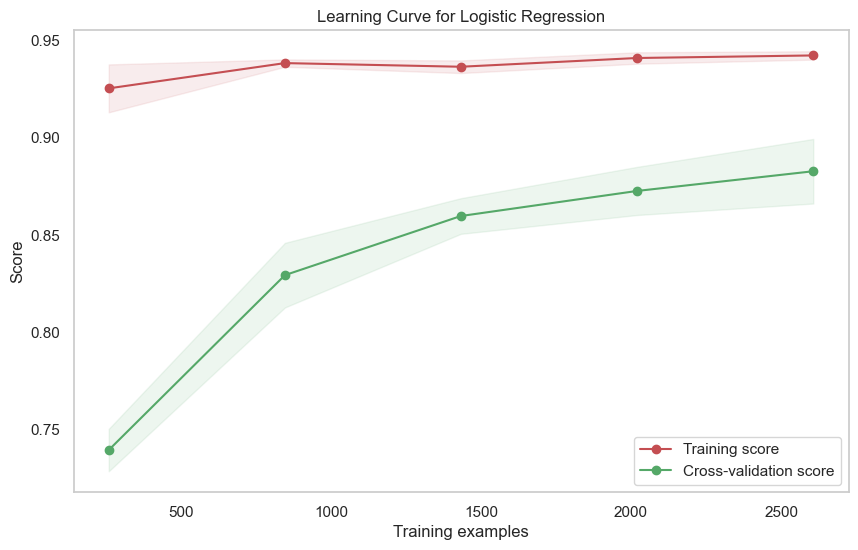

In [27]:
# Plot learning curve for Logistic Regression
plot_log = plot_learning_curve(logistic_model, "Learning Curve for Logistic Regression", X, y, cv=5)
plot_log.show()

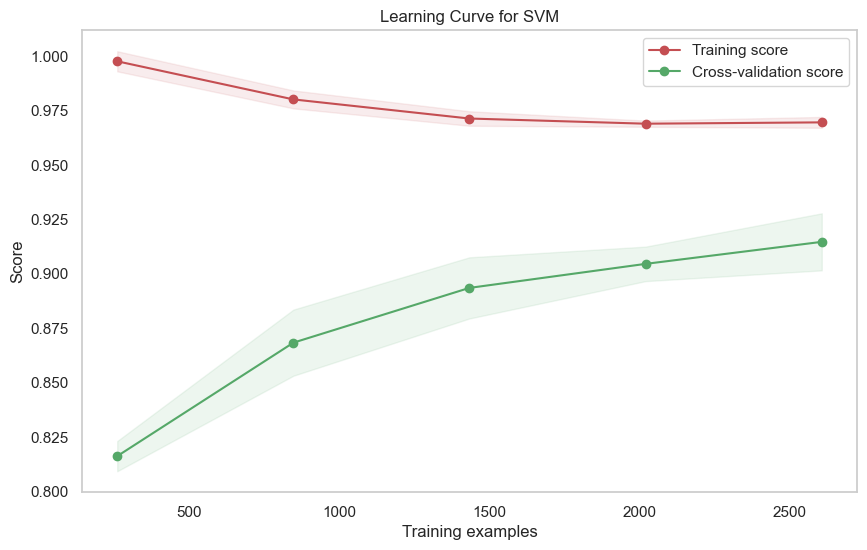

In [28]:
# Plot learning curve for SVM
plot_svm = plot_learning_curve(svm_model, "Learning Curve for SVM", X, y, cv=5)
plot_svm.show()

In [29]:
# Save the model to a file
dump(svm_model_new, 'svm_model_new.joblib')

['svm_model_new.joblib']

# SECTION C

## RESULT AND CONCLUSION
Using the conventional traditional Algorithms to carry out this task utilizing Logistic Regression and Support Vector Machine Algorithms to train the model they both yielded good results on the dataset. To get the optimal performance techniques like Feature engineering, cross validation, hyperparameter tuning had to be carried out to improve the performance metrics of both models. 
Considering the imbalance in the 3 categories of the category column as visualized with the histogram there was need to also evaluate the performance metric by the weighted and macro metrics which considers the class imbalance. The learning curve was also plotted to know how fitting the model is for this task.

All this led to deciding the model that is the best fit for this task based on 
- Performance metrics
- Learning curve

The performance metrics for both model yielded high scores across the Precision, Recall and F1-Score. However, the SVM had higher Accuracy, Cross-validation, Precision and Recall score than the Logistic regression both before hypertuning and after. The result after hyperparameter tuning of the SVM points towards overfitting while the Logistic regression improved significantly across all the metrics after hyperparameter tuning.

The learning curve indictates:

- Logistic regression graph starts quite high and remains stable as more data is added, with a very slight decrease. There's a steady improvement as more training examples are added, and it appears to converge towards the training score. The model might initially be slightly overfitting, but as more data is added, it begins to generalize better. The convergence of the training and cross-validation scores suggests that increasing the amount of training data is effectively reducing overfitting

- The SVM graph started off performing well at a very high training score and slightly decreases, maintaining a level close to 1.0. This indicates the model fits the training data well. The score also increases with the number of training examples, showing improved generalization from more data, but it is still significantly lower than the training score. The model is overfitting. This is evident because the training score is much higher than the cross-validation score, and despite the gap slightly closing as more data is used, it remains substantial.

**Conclusion**

Considering all this results the best classifier model for this task is to use the logistic regression model to classify the professions based on the reddit comments into their respective category. With addition of more data the Logistic regression model will perform batter than its current state.